---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
        
    G_df = pd.read_csv('Employee_Movie_Choices.txt', delimiter='\t', header=0, names=['employee', 'movie'])
    #G = nx.from_pandas_dataframe(G_df, 'Employee', 'Movie')
    G = nx.Graph()
    G.add_nodes_from(G_df['employee'], bipartite=0)
    G.add_nodes_from(G_df['movie'], bipartite=1)

    edges = list(zip(G_df['employee'], G_df['movie']))
    G.add_edges_from(edges)
    
    return G

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [3]:
def answer_two():
    
    G = answer_one()
    
    for node in employees:
        update_str = {'type':'employee'}
        G.node[node].update(update_str)
        
    for node in movies:
        update_str = {'type':'movie'}
        G.node[node].update(update_str)
    
    return G

[('Andy', {'bipartite': 0, 'type': 'employee'}),
 ('Claude', {'bipartite': 0, 'type': 'employee'}),
 ('Frida', {'bipartite': 0, 'type': 'employee'}),
 ('Georgia', {'bipartite': 0, 'type': 'employee'}),
 ('Joan', {'bipartite': 0, 'type': 'employee'}),
 ('Lee', {'bipartite': 0, 'type': 'employee'}),
 ('Pablo', {'bipartite': 0, 'type': 'employee'}),
 ('Vincent', {'bipartite': 0, 'type': 'employee'}),
 ('Anaconda', {'bipartite': 1, 'type': 'movie'}),
 ('Mean Girls', {'bipartite': 1, 'type': 'movie'}),
 ('The Matrix', {'bipartite': 1, 'type': 'movie'}),
 ('Monty Python and the Holy Grail', {'bipartite': 1, 'type': 'movie'}),
 ('Snakes on a Plane', {'bipartite': 1, 'type': 'movie'}),
 ('The Shawshank Redemption', {'bipartite': 1, 'type': 'movie'}),
 ('The Social Network', {'bipartite': 1, 'type': 'movie'}),
 ('Forrest Gump', {'bipartite': 1, 'type': 'movie'}),
 ('Kung Fu Panda', {'bipartite': 1, 'type': 'movie'}),
 ('The Dark Knight', {'bipartite': 1, 'type': 'movie'}),
 ('The Godfather', {'

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


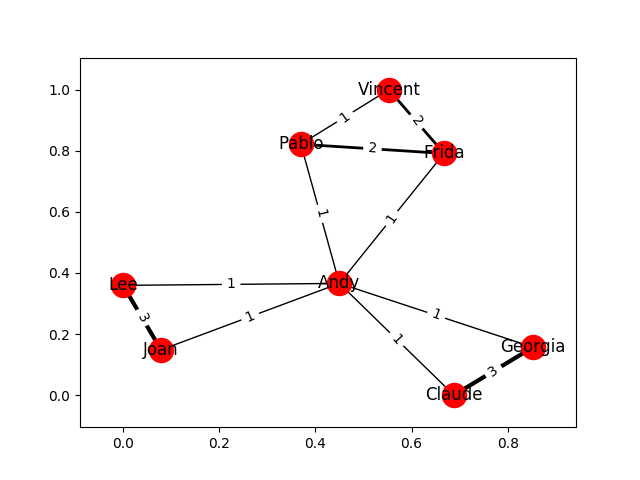

In [10]:
def answer_three():
    
    G = answer_two()
    proj_G = bipartite.weighted_projected_graph(G, employees)
    
    return proj_G

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [30]:
def answer_four():
        
    G = answer_three()
    R = nx.read_edgelist('Employee_Relationships.txt' ,data=[('rel_score', int)])
    
    G_df = pd.DataFrame(G.edges(data=True), columns=['Emp1', 'Emp2', 'movies_score'])
    R_df = pd.DataFrame(R.edges(data=True), columns=['Emp1', 'Emp2', 'rel_score'])
    
    G2_df = G_df.copy()
    G2_df.rename(columns={"Emp1":"Emp", "Emp2":"Emp1"}, inplace=True)
    G2_df.rename(columns={"Emp":"Emp2"}, inplace=True)
    
    df = pd.concat([G_df, G2_df])
    df = pd.merge(df, R_df, on = ['Emp1', 'Emp2'], how='right')
    
    df['movies_score'] = df['movies_score'].apply(lambda x: {'weight': 0} if x is np.nan else x)
    
    df['movies_score'] = df['movies_score'].apply(lambda x: x['weight'])
    df['rel_score'] = df['rel_score'].apply(lambda x: x['rel_score'])
    
    value = df['movies_score'].corr(df['rel_score'])
    
    return value